### Guiding questions for this notebook:

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline
import datetime as dt

In [210]:
data = pd.read_csv('featured_data.csv')
df = data.copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Order_Hour,Order_Day,Sale_Value,Buyer_State,Buyer_City,Product_Simplified,Product_Brand_Simplified
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,30,1700.00,NY,New York City,Computer,Apple
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,29,600.00,NY,New York City,NaN,LG
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,12,11.95,NY,New York City,Cable,NaN
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,22,149.99,CA,San Francisco,Monitor,NaN
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,18,11.95,GA,Atlanta,Cable,NaN


In [211]:
df.dtypes

Order ID                      int64
Product                      object
Quantity Ordered            float64
Price Each                  float64
Order Date                   object
Purchase Address             object
Order_Month                   int64
Order_Hour                    int64
Order_Day                     int64
Sale_Value                  float64
Buyer_State                  object
Buyer_City                   object
Product_Simplified           object
Product_Brand_Simplified     object
dtype: object

## What was the best month for sales? How much was earned that month?

In [212]:
monthly_sales_values = []

for x in range(1,13):
    table = df.loc[df['Order_Month'] == x]
    monthly_sales_values.append(table['Sale_Value'].sum())

In [213]:
monthly_sales = pd.DataFrame()
monthly_sales['Month'] = pd.date_range(start='2020-01', freq='M', periods=12).month_name()
monthly_sales['Total Sales ($)'] = monthly_sales_values
monthly_sales.sort_values(by=['Total Sales ($)'])

,Month,Total Sales ($)
0,January,1822256.73
8,September,2097560.13
1,February,2202022.42
7,August,2244467.88
5,June,2577802.26
6,July,2647775.76
2,March,2807100.38
4,May,3152606.75
10,November,3199603.20
3,April,3390670.24


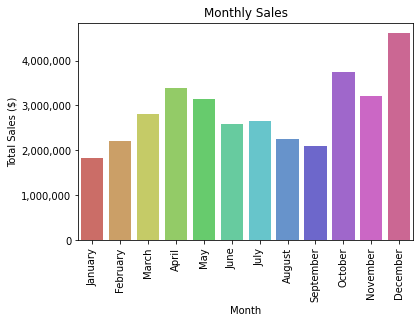

In [214]:
chart = sns.barplot(x="Month", y="Total Sales ($)", data=monthly_sales, palette = 'hls')
chart.set_title('Monthly Sales')
plt.ticklabel_format(style='plain', axis='y')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## What city sold the most product?

In [215]:
city_sales_values = []

for city in df['Buyer_City'].unique():
    table = df.loc[df['Buyer_City'] == city]
    city_sales_values.append(table['Sale_Value'].sum())

city_sales_values

[4664317.43,
 8262203.91,
 2795498.58,
 2320490.6099999994,
 2767975.4,
 5452570.799999999,
 3661642.01,
 1819581.7499999995,
 2747755.4799999995]

In [216]:
city_sales = pd.DataFrame()
city_sales['City'] = df['Buyer_City'].unique()
city_sales['Total Sales ($)'] = city_sales_values
city_sales.sort_values(by=['Total Sales ($)'])

,City,Total Sales ($)
7,Austin,1819581.75
3,Portland,2320490.61
8,Seattle,2747755.48
4,Dallas,2767975.40
2,Atlanta,2795498.58
6,Boston,3661642.01
0,New York City,4664317.43
5,Los Angeles,5452570.80
1,San Francisco,8262203.91


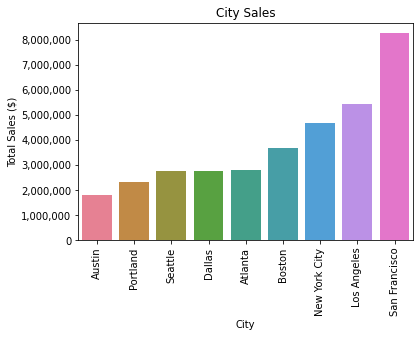

In [217]:
chart = sns.barplot(x="City", y="Total Sales ($)", data=city_sales, order=city_sales.sort_values(by=['Total Sales ($)']).City, palette = 'husl')
chart.set_title('City Sales')
plt.ticklabel_format(style='plain', axis='y')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## What state sold the most product?

In [218]:
state_sales_values = []

for state in df['Buyer_State'].unique():
    table = df.loc[df['Buyer_State'] == state]
    state_sales_values.append(table['Sale_Value'].sum())

state_sales_values

[4664317.43,
 13714774.709999999,
 2795498.58,
 1870732.3399999999,
 4587557.15,
 3661642.01,
 449758.27,
 2747755.4799999995]

In [219]:
state_sales = pd.DataFrame()
state_sales['State'] = df['Buyer_State'].unique()
state_sales['Total Sales ($)'] = state_sales_values
state_sales.sort_values(by=['Total Sales ($)'])

,State,Total Sales ($)
6,ME,449758.27
3,OR,1870732.34
7,WA,2747755.48
2,GA,2795498.58
5,MA,3661642.01
4,TX,4587557.15
0,NY,4664317.43
1,CA,13714774.71


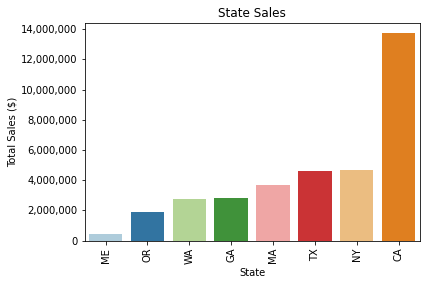

In [220]:
chart = sns.barplot(x="State", y="Total Sales ($)", data=state_sales, order=state_sales.sort_values(by=['Total Sales ($)']).State, palette = 'Paired')
chart.set_title('State Sales')
plt.ticklabel_format(style='plain', axis='y')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## What day of the week is the best day for sales?

In [221]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['day_of_week'] = df['Order Date'].dt.day_name()
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=
    ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    ordered=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Order_Hour,Order_Day,Sale_Value,Buyer_State,Buyer_City,Product_Simplified,Product_Brand_Simplified,day_of_week
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,30,1700.00,NY,New York City,Computer,Apple,Monday
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,29,600.00,NY,New York City,NaN,LG,Sunday
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,12,11.95,NY,New York City,Cable,NaN,Thursday
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,22,149.99,CA,San Francisco,Monitor,NaN,Sunday
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,18,11.95,GA,Atlanta,Cable,NaN,Wednesday


In [222]:
dayofweek_sales_values = []

for day in df['day_of_week'].unique():
    table = df.loc[df['day_of_week'] == day]
    dayofweek_sales_values.append(table['Sale_Value'].sum())
dayofweek_sales_values

[4883326.719999999,
 4932169.66,
 4839465.159999999,
 4988822.259999999,
 5087956.78,
 4855938.38,
 4904357.01]

In [223]:
dayofweek_sales = pd.DataFrame()
dayofweek_sales['day_of_week'] = df['day_of_week'].unique()
dayofweek_sales['Total Sales ($)'] = dayofweek_sales_values
dayofweek_sales.sort_values(by=['Total Sales ($)'])

,day_of_week,Total Sales ($)
2,Thursday,4839465.16
5,Friday,4855938.38
0,Monday,4883326.72
6,Saturday,4904357.01
1,Sunday,4932169.66
3,Wednesday,4988822.26
4,Tuesday,5087956.78


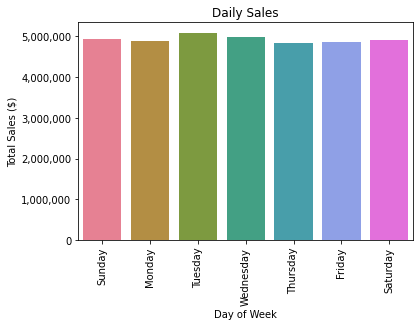

In [224]:
chart = sns.barplot(x="day_of_week", y="Total Sales ($)", data=dayofweek_sales, order=None, palette = 'husl')
chart.set_title('Daily Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Day of Week")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## What hour of the day is the best day for sales?

In [229]:
hourly_sales_values = []

for x in df['Order_Hour'].unique():
    table = df.loc[df['Order_Hour'] == x]
    hourly_sales_values.append(table['Sale_Value'].sum())
hourly_sales_values

[713721.27,
 744854.1199999999,
 2219348.3,
 1941549.5999999999,
 2316821.34,
 1607549.2099999997,
 1639030.5799999998,
 1179304.44,
 2300610.24,
 2155389.8,
 2129361.61,
 2412938.5399999996,
 2083672.73,
 1904601.3099999998,
 460866.88,
 448113.0,
 1944286.7699999998,
 2281716.2399999998,
 2042000.8599999999,
 1192348.97,
 145757.89,
 230679.82,
 234851.44,
 162661.01]

In [230]:
hourly_sales = pd.DataFrame()
hourly_sales['Hour'] = df['Order_Hour'].unique()
hourly_sales['Total Sales ($)'] = hourly_sales_values
hourly_sales.sort_values(by=['Total Sales ($)'])

,Hour,Total Sales ($)
20,3,145757.89
23,4,162661.01
21,5,230679.82
22,2,234851.44
15,6,448113.00
14,1,460866.88
0,0,713721.27
1,7,744854.12
7,23,1179304.44
19,8,1192348.97


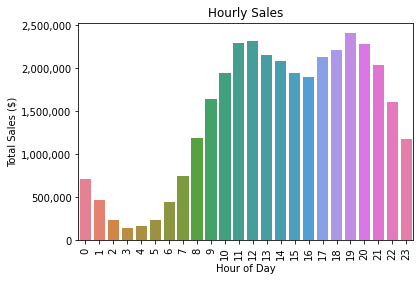

In [242]:
chart = sns.barplot(x="Hour", y="Total Sales ($)", data=hourly_sales, order=None, palette = 'husl')
chart.set_title('Hourly Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Hour of Day")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

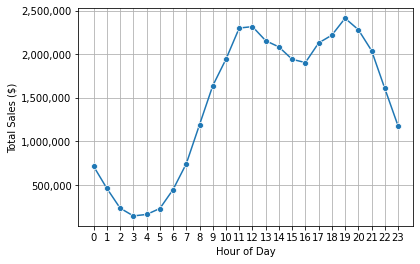

In [273]:
ax = sns.lineplot(x='Hour', y='Total Sales ($)', data=hourly_sales, palette = 'husl', marker='o',)
chart.set_title('Hourly Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Hour of Day")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xticks(range(0,24))
plt.grid()
chart.set_title('Hourly Sales')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

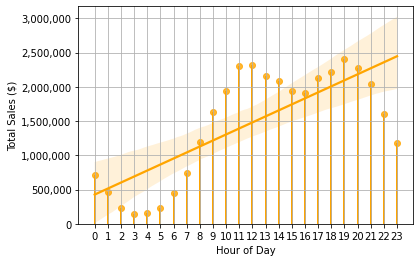

In [270]:
x = hourly_sales['Hour']
y = hourly_sales['Total Sales ($)']

fig, ax = plt.subplots()

ax.bar(x,y, color='orange', width=0.15)
sns.regplot(x=x, y=y, color='orange',ax=ax)
ax.set_ylim(0, None)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Hour of Day")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xticks(range(0,24))
plt.grid()
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()